## Need of Normalization in Neural Network
============================================

Consider a neural network with 2 features - **_x1_** and **_x2_** in the input. <br>
**_x1_** $\epsilon$ $\{0, 1000\}$ and **_x2_** $\epsilon$ $\{0, 1\}$.<br>
Consider the weights assigned to edge connected to input **_x1_** be ***w1*** and **_x2_** be ***w2*** <br>

Then the output of the forward pass:
 ***o1*** = ***w1*** * ***x1*** + ***w2*** * ***x2***

 Considering the ground truth be ***o*** and Error Function be **MAE(mean absolute error)**, the error would be **E** = \|***o*** -  ***o1***\|<br>
The backward pass for w1 will be:
$\frac{\partial E}{\partial w1}$ = $\frac{\partial E}{\partial o1}$ * $\frac{\partial o1}{\partial w1}$ = ***-x1***
<br>
The backward pass for w2 will be:
$\frac{\partial E}{\partial w2}$ = $\frac{\partial E}{\partial o1}$ * $\frac{\partial o1}{\partial w2}$ = ***-x2***
<br>
<br>
As we can see the impact of ***x1*** will be larger on weight update for ***w1*** than that of ***x2*** on ***w2***. <br>
So, If the features don't have values in same range, the feature with large values will dominate the learning process.<br>
This can cause the network to perform poorly.<br>
Normalization brings the values in same range and avoids the impact of outlier values..
<br>
<br>
Normalization also help neural network to converge better,by keeping the weights and activations within a reasonable range.<br>
This can help to prevent vanishing or exploding gradients, which can slow down or prevent learning. 
<br>
<br>
Normalization can also help to make the optimization process more stable by reducing the sensitivity of the network to changes in the input or weights.


## What is normalization

As mentioned above the normalizatioon brings the values in  particular range. <br>
The most common normalization method is to bring the mean to 0 and standrad deviation to 1 <br>
<br>
Let's see this with simple example

In [1]:
# Let's try out simple normalization on some random distribution
from torch import randint

In [2]:
x = randint(0, 20, (100, 2))
x = x.float()

In [3]:
# max and min values in distribution
import torch

In [4]:
torch.min(x[:, 0]), torch.max(x[:, 0])

(tensor(0.), tensor(19.))

In [5]:
torch.min(x[:, 1]), torch.max(x[:, 1])

(tensor(0.), tensor(19.))

In [6]:
# Let's Normalize the tensor
mean = x.mean(dim=0)

In [7]:
std = x.std(dim=0)

In [8]:
x_dash = (x - mean) / std

In [9]:
torch.min(x_dash[:, 0]), torch.max(x_dash[:, 0])

(tensor(-1.6026), tensor(1.5659))

In [10]:
torch.min(x_dash[:, 1]), torch.max(x_dash[:, 1])

(tensor(-1.3435), tensor(1.6178))

In [11]:
import matplotlib.pyplot as plt

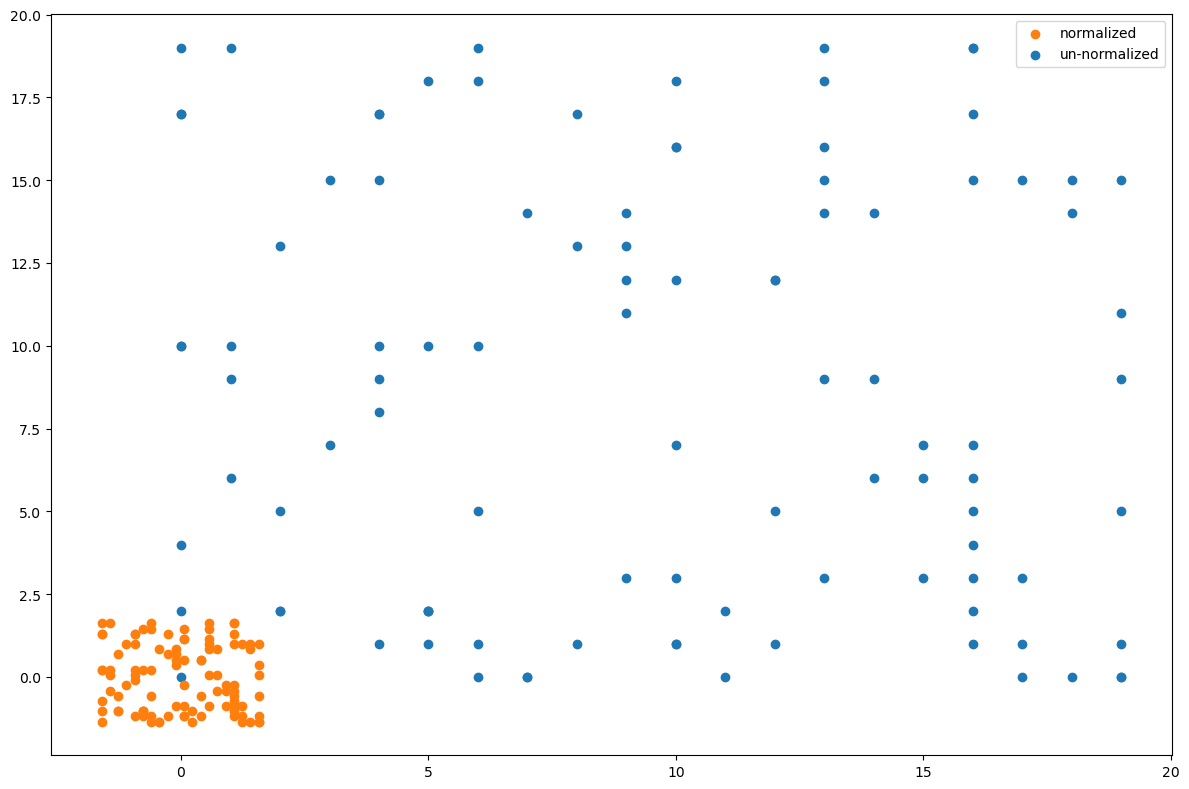

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axes.scatter(x[:, 0], x[:, 1], label="un-normalized")
axes.scatter(x_dash[:, 0], x_dash[:, 1], label="normalized")
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles[::-1], labels[::-1])
fig.tight_layout()

## What is Covariate shift?

Covariate shift is change in the distribution of input variables to neural network <br>
covariate shift can easily occur due to outliers <br>
Let's add few outliers to the distribution and see how the distribution looks <br>
And let's also check what happens when we apply normalization to the distribution with outliers.

In [13]:
# Add outliers to distribution
x_out = x.detach().clone()

In [14]:
x_out[:8, 0] = 31 * x_out[-8:, 0]
x_out[-8:, 1] = 17 * x_out[:8, 1]

In [15]:
mean_out = x_out.mean(dim=0)
mean_out

tensor([34.5100, 17.5000])

In [16]:
std_out = x_out.std(dim=0)
std_out

tensor([99.1557, 41.7396])

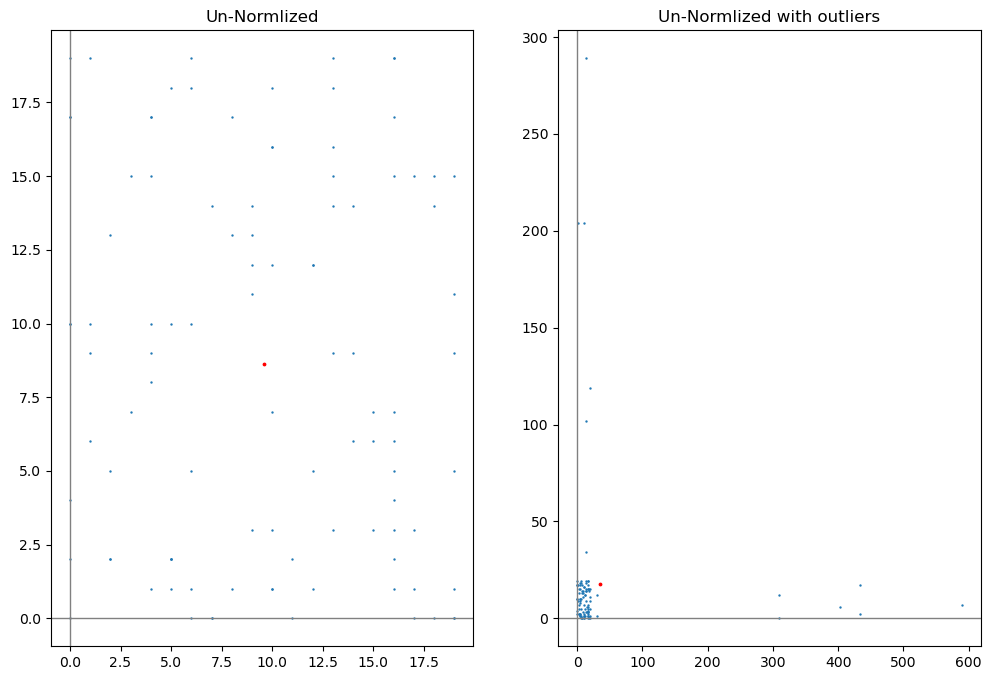

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
###############################
axs[0].scatter(x[:, 0], x[:, 1], s=0.5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].scatter(mean[0], mean[1], c='red', s=3)
axs[0].set_title(f"Un-Normlized")
###############################
axs[1].scatter(x_out[:, 0], x_out[:, 1], s=0.5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].scatter(mean_out[0], mean_out[1], c='red', s=3)
axs[1].set_title(f"Un-Normlized with outliers")
###############################
plt.show()

As we can see the outliers can change the distribution and have impact on training of the neural network. <br>
BatchNormalization is introduced exactly to reduce the internal covariate shift. <br>

## Batch Normalization

<a href=https://arxiv.org/pdf/1502.03167> Paper </a>

***Internal Covariate Shift*** is the change in the distribution of network activations due to the change in network parameters during training.Training Deep Neural Networks is complicated. The distribution of each layer’s inputs changes during training, as the parameters of the previous layers change.This slows down the training by requiring lower learning rates and careful parameter initialization. <br>
<br>
In simple words, the input layer distribution is constantly changing due to weight update. In this case, the following layer always needs to adapt to the new distribution. It causes slower convergence and unstable training. <br>
<br>
Batch Normalization reduces ***Internal Covariate Shift*** and makes it easy to train the deep neural network with larger learning rate and converge it faster.

The neural network is trained using ***Stochastic Gradient Descent(SGD)***, where the input data is passed to network in batches <br>
Batch Normalization normalizes the input data across the batch dimension. Batch Normalization also presents a way to control and optimize the distribution after each layer. The process is identical to the input normalization, but we add two learnable parameters, γ, and β.
These two parameters are learned along the network using backpropagation. They optimize the distribution by ***scaling(γ)*** and ***shifting(β)*** activations.
<br><br>
Since distributions are fixed, the larger learning rate can be used and it can speed up the convergence.<br>
BatchNormalization also serves as a regularisation technique. The noise generated by approximation of the dataset’s statestics probably remove the need for dropout.

<br>
<center><img src="files/batch_normalization.png"/></center>
<p style="text-align: center">
    <b>N- batch size, C — number of channels, H,W— spatial width and height. <a href=https://arxiv.org/pdf/1803.08494>Source</a></b>
</p>
<br>
Let's implement the Batch Normalization in pytorch

In [18]:
import torch.nn as nn

In [19]:
# Simple batch normalization implementation
class BatchNorm(nn.Module):
    r"""
    Applies Batch Normalization over 4D input tensor.
    Usually the pytorch batch has shape [N, C, H, W] 
    and the batch normalization is performed on the dimension C.
    The Output is tensor of same size as input.

    There are two learnable parameters of size C used to control the normalization.
    gamma - is used to scale the norm. It is usually set to 1 at the start.
    beta - is used to shift the norm. It is usually set to 0 at the start.

    Args:
        num_features(int): Number of features. It is the dimension C in
                           input tensor size [N, C, H, W]
        eps(float):        Value added to the denominator for numerical stability
                           Default = 1e-5

    Shapes:
        input :  [N, C, H, W]
        output : [N, C, H, W]

    Example:
        >>> x = torch.rand((10, 20, 5, 4))
        >>> bn = BatchNorm(20)
        >>> out = bn(x)
    """
    def __init__(self, num_features: int, eps: float=1e-05) -> None:
        super().__init__()
        self.num_features = num_features
        self.eps = eps
        self.register_params()

    def register_params(self):
        self.gamma = nn.Parameter(torch.ones((1, self.num_features, 1, 1)))
        self.beta = nn.Parameter(torch.zeros((1, self.num_features, 1, 1)))
        self.register_parameter('beta', self.beta)
        self.register_parameter('gamma', self.gamma)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        assert x.ndim == 4, "Batch Normalization works with 4-D tensors."
        mean = torch.mean(x, dim=[0, 2, 3], keepdim=True) # [1, C, 1, 1]
        var = torch.var(x, dim=[0, 2, 3], keepdim=True, unbiased=False) # [1, C, 1, 1]
        norm = (x - mean) / torch.sqrt(var + self.eps)
        res = self.gamma * norm + self.beta
        return res

In [20]:
# Let's test the implementation
x = torch.rand((1, 3, 2, 2))

In [21]:
my_batch_norm = BatchNorm(3)

In [22]:
output = my_batch_norm(x)

In [23]:
output.shape

torch.Size([1, 3, 2, 2])

In [24]:
# Let's compare the results with pytorch's BatchNorm2D
pt_batch_norm = nn.BatchNorm2d(3, momentum=0.0, affine=False)

In [25]:
output_pt = pt_batch_norm(x)

In [26]:
output_pt

tensor([[[[ 0.3189, -1.4221],
          [-0.2443,  1.3475]],

         [[ 1.2604,  0.4598],
          [-1.4597, -0.2604]],

         [[ 1.0019,  0.9970],
          [-1.0450, -0.9539]]]])

In [27]:
output

tensor([[[[ 0.3189, -1.4221],
          [-0.2443,  1.3475]],

         [[ 1.2604,  0.4598],
          [-1.4597, -0.2604]],

         [[ 1.0019,  0.9970],
          [-1.0450, -0.9539]]]], grad_fn=<AddBackward0>)

In [28]:
torch.allclose(output, output_pt)

True

So , we are getting the results similar to pytorch BatchNorm2D :)

## Example

Let's train resnet34 model with and with out BatchNormalization <br>
I was going to try smaller and shallower LetNet model, but batch normalization may be more useful <br>
for deeper models.

In [ ]:
import torch.nn.functional as F

In [ ]:
from torchvision import models

Let's set all the batch normalization layers to Identity so that we won't have any batch normalization in the model.

In [ ]:
def get_all_parent_layers(net, type):
    layers = []
    for name, l in net.named_modules():
        if isinstance(l, type):
            tokens = name.strip().split('.')
            layer = net
            for t in tokens[:-1]:
                if not t.isnumeric():
                    layer = getattr(layer, t)
                else:
                    layer = layer[int(t)]

            layers.append([layer, tokens[-1]])

    return layers

In [ ]:
def get_resent34_model(skip_all_bn = True, in_ch=1, num_classes=10):
    model = models.resnet34()
    if skip_all_bn:
        for parent_layer, last_token in get_all_parent_layers(model, nn.BatchNorm2d):
            setattr(parent_layer, last_token, nn.Identity())
    model.conv1 = nn.Conv2d(in_ch, 64, kernel_size=7, stride=2, padding=3, bias=False)
    model.fc = nn.Linear(in_features=512, out_features=num_classes, bias=True)
    return model

In [ ]:
model = get_resent34_model()

In [ ]:
model

### Load MNIST Dataset

In [ ]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
torch.manual_seed(42)

In [ ]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True, transform=transforms.ToTensor())

In [ ]:
# Calculate mean and std
imgs = torch.stack([img for img, _ in train_val_dataset], dim=0)

mean = imgs.view(1, -1).mean(dim=1)    # or imgs.mean()
std = imgs.view(1, -1).std(dim=1)     # or imgs.std()
mean, std

In [ ]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])

In [ ]:
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True, transform=mnist_transforms)

In [ ]:
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])

In [ ]:
BATCH_SIZE = 128

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

#### Visualize the data

In [ ]:
class_names = train_val_dataset.classes

In [ ]:
def plot_imgs(ds, *, test=False, model=None, rows=5, cols=4):
    fig = plt.figure(figsize=(16, 10))

    for i in range(1, (rows*cols) + 1):
        rand_ind = torch.randint(0, len(ds), size=[1]).item()
        img, label = ds[rand_ind]
        fig.add_subplot(rows, cols, i)
        img = img.permute(1, 2, 0)
        plt.imshow(img, cmap='gray')
        if test:
            label_pred = torch.argmax(model(img.unsqueeze(0)))
            if label_pred == label:
                plt.title(f"Actual:{class_names[label]}/\nPredicted:{class_names[label_pred]}", color='g')
            else:
                plt.title(f"Actual:{class_names[label]}/]\nPredicted:{class_names[label_pred]}", color='r')
        else:
            plt.title(f"{class_names[label]}")
        plt.axis(False)
        plt.tight_layout()

In [ ]:
plot_imgs(train_val_dataset)

### Training

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Learning Rate
lr = 1e-2

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter

In [ ]:
from datetime import datetime
import os

In [ ]:
# Experiment tracking
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "ResNet34_Without_BatchNorm_Lr_0.01"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

In [ ]:
# device-agnostic setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
num_epochs = 12

In [ ]:
def train(train_loader, val_loader, model, loss_fn, optimizer, num_epochs, writer):
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_acc = 0.0, 0.0
        tot = 0
        for X, y in tqdm(train_loader):
            X, y = X.to(device), y.to(device)
            model.train()
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()
            train_acc += (torch.argmax(y_pred, dim=1) == y).float().sum()
            tot += len(y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        train_loss /= len(train_loader)
        train_acc = train_acc * 100 / tot
            
        # Validation loop
        val_loss, val_acc = 0.0, 0.0
        tot = 0
        model.eval()
        with torch.inference_mode():
            for X, y in tqdm(val_loader):
                X, y = X.to(device), y.to(device)
                y_pred = model(X)
                loss = loss_fn(y_pred, y)
                val_loss += loss.item()
                val_acc += (torch.argmax(y_pred, dim=1) == y).float().sum()
                tot += len(y)
                
            val_loss /= len(val_loader)
            val_acc = val_acc * 100 /tot
            
        writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
        writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)

        print(f"Epoch: {epoch+1}| Train loss: {train_loss: .5f}| Train acc: {train_acc: .5f}| Val loss: {val_loss: .5f}| Val acc: {val_acc: .5f}")

In [ ]:
model = model.to(device)

In [ ]:
train(train_dataloader, val_dataloader, model, loss_fn, optimizer, num_epochs, writer)

In [ ]:
from pathlib import Path

In [ ]:
def save_model(model, model_name, *, model_path='models'):
    Path(model_path).mkdir(parents=True, exist_ok=True)
    MODEL_SAVE_PATH = Path(model_path) / Path(model_name)

    # Saving the model
    print(f"Saving the model: {MODEL_SAVE_PATH}")
    torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

    print(f"Model {model_name} saved successfully at {MODEL_SAVE_PATH}")

In [ ]:
def load_model(model, model_path):
    model.load_state_dict(model_path)
    return model

In [ ]:
def test(test_loader, model, loss_fn):
    test_loss, test_acc = 0, 0
    tot = 0
    model.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            
            test_loss += loss_fn(y_pred, y)
            test_acc += (torch.argmax(y_pred, dim=1) == y).float().sum()
            tot += len(y)
            
        test_loss /= len(test_loader)
        test_acc = test_acc * 100 / tot
    
    print(f"Test loss: {test_loss: .5f}| Test acc: {test_acc: .5f}")

In [ ]:
test(test_dataloader, model, loss_fn)

In [ ]:
save_model(model, 'ResNet34_without_bn_lr_0.01')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir={log_dir}

#### Let's try to use learning rate = 0.1

We tried with learning rate = 1e-2 , where the training was smooth, but after 4-5 epochs the validation loss started to diverge from train loss<br>
The model started to overfit on training data <br>
Let's check if the training is stable at higher learning rate like 1e-1

In [ ]:
lr1 = 1e-1
model1 = get_resent34_model()
model1 = model1.to(device)
optimizer1 = torch.optim.SGD(model1.parameters(), lr=lr1)

In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "ResNet34_Without_BatchNorm_Lr_0.1"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

In [ ]:
train(train_dataloader, val_dataloader, model1, loss_fn, optimizer1, num_epochs, writer)

As we can see, the model is not training at all at learning rate 0.1<br>
Let's see if we can train the model at learning rate 0.1 by adding batch normalization

In [ ]:
model2 = get_resent34_model(skip_all_bn=False)
model2 = model2.to(device)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=lr1)

In [ ]:
model2

In [ ]:
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "ResNet34_BatchNorm_Lr_0.1"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

In [ ]:
train(train_dataloader, val_dataloader, model2, loss_fn, optimizer2, num_epochs, writer)

In [ ]:
test(test_dataloader, model2, loss_fn)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir={log_dir}

Not only the model can be trained at higher learning rate(0.1), but the test accuracy is also high.
<br>
**Note:** - I tried with resnet18 too, but there wasn't much difference in the performance.<br> It seems the benefits of batch normalization are visible at depth.

There are 2 issues with Batch Normalizations:

*  The normalization works well on large batch sizes as mean and variance estimations are fairly tolerable. For small batch sizes performance decreases significantly.

*  Model has to use mean and variance estimates calculated at training time, for calculations during inference time. This might lead to wrong results.

Due to these issues, various other variants of Normalization has been proposed and used, like:
* Layer Normalization
* Instance Normalization
* Group Normalization

## Layer Normalization

To avoid the dependence on the batch size, <a href="https://arxiv.org/pdf/1607.06450">Layer Normalization</a> was introduced. <br>
Layer Normalization works by normalizing the activations for each individual sample, by subtracting mean and dividing by standard deviation <br>
So the normalization is performed across the features for sample. <br>
During the inference the normalization is based on statestics calculated on test data instead of train data statestics as in batch normalization.


<br>
<center><img src="files/layer_normalization.png"/></center>
<p style="text-align: center">
    <b>N- batch size, C — number of channels, H,W— spatial width and height. <a href=https://arxiv.org/pdf/1803.08494>Source</a></b>
</p>
</br>

Layer Normalization is common in case of NLP models like RNN, LSTM and transformers where the batch size is usually smaller<br>
<br>
* As the Layer Normalization works on features, it works on any batch size.
* The implementation is simpler during inference, as there is no need to keep track of training data statestics.
<br>
Layer Normalization may not perform well on large batch sizes.
<br>
Now let's implement Layer Normalization 

In [29]:
# Simple layer normalization implementation
class LayerNorm(nn.Module):
    r"""
    Applies Layer Normalization over input tensor.
    and the layer normalization is performed on the dimensions based on normalized shape
    The Output is tensor of same size as input.

    There are two learnable parameters of size C used to control the normalization.
    gamma - is used to scale the norm. It is usually set to 1 at the start.
    beta - is used to shift the norm. It is usually set to 0 at the start.

    Args:
        normalized_shape(int or list or torch.Size): Input shape from an expected input of size
        eps(float):        Value added to the denominator for numerical stability
                           Default = 1e-5

    Shapes:
        input :  [N, *]
        output : [N, *]

    Example:
        >>> # NLP
        >>> x = torch.rand((10, 5, 20)) #(batch, sentence_length , embedding_size)
        >>> ln = LayerNorm(20)
        >>> out = ln(x)
        >>>
        >>> # Images
        >>> x1 = torch.rand((10, 5, 20, 6)) #(N, C, H, W)
        >>> ln1 = LayerNorm((5, 20, 6))
        >>> out1 = ln1(x1) 
    """
    def __init__(self, normalized_shape: int, eps: float=1e-05) -> None:
        super().__init__()
        if isinstance(normalized_shape, int):
            normalized_shape = (normalized_shape, )
        self.normalized_shape = tuple(normalized_shape)
        self.eps = eps
        self.register_params()

    def register_params(self):
        self.gamma = nn.Parameter(torch.ones(self.normalized_shape))
        self.beta = nn.Parameter(torch.zeros(self.normalized_shape))
        self.register_parameter('beta', self.beta)
        self.register_parameter('gamma', self.gamma)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        dims = x.ndim - len(self.normalized_shape)
        shp = list(x.shape)[dims:]
        assert shp == list(self.normalized_shape), f"Given Normalized shape = {list(self.normalized_shape)},Input shape should be [* {str(self.normalized_shape)[1:-1]}] , received {list(x.shape)}" 
        stat_dim = list(reversed([-(i+1) for i, _ in enumerate(range(dims, x.ndim))]))      
        mean = x.mean(dim=stat_dim, keepdim=True)
        var = x.var(dim=stat_dim, keepdim=True, correction=0) # Don't apply Bessel's correction
        norm = (x - mean) / torch.sqrt(var + self.eps)
        res = self.gamma * norm + self.beta
        return res

#### Image example

In [30]:
x = torch.rand((1, 3, 2, 2))

In [31]:
ln = LayerNorm((2, 2))

In [32]:
ln(x)

tensor([[[[-0.3809,  0.3834],
          [-1.3626,  1.3601]],

         [[ 0.7685,  0.2299],
          [ 0.6957, -1.6941]],

         [[-0.6398, -0.0261],
          [-0.9647,  1.6306]]]], grad_fn=<AddBackward0>)

In [33]:
# Comparing with Pytorch

In [34]:
ln_pt = nn.LayerNorm((2, 2))

In [35]:
ln_pt(x)

tensor([[[[-0.3809,  0.3834],
          [-1.3626,  1.3601]],

         [[ 0.7685,  0.2299],
          [ 0.6957, -1.6941]],

         [[-0.6398, -0.0261],
          [-0.9647,  1.6306]]]], grad_fn=<NativeLayerNormBackward0>)

In [36]:
torch.allclose(ln(x), ln_pt(x))

True

#### NLP example

In [37]:
x1 = torch.rand((2, 4, 3)) #(batch, sentence_length , embedding_size)

In [38]:
ln1 = LayerNorm(3)

In [39]:
ln1(x1)

tensor([[[-0.5019,  1.3943, -0.8924],
         [ 0.5346, -1.4008,  0.8662],
         [-1.1054,  1.3165, -0.2112],
         [ 1.1673,  0.1076, -1.2749]],

        [[-1.3909,  0.4834,  0.9076],
         [-1.4122,  0.6419,  0.7703],
         [ 1.0577, -1.3417,  0.2841],
         [ 1.2468, -1.1997, -0.0470]]], grad_fn=<AddBackward0>)

In [40]:
ln_pt1 = nn.LayerNorm(3)

In [41]:
ln_pt1(x1)

tensor([[[-0.5019,  1.3943, -0.8924],
         [ 0.5346, -1.4008,  0.8662],
         [-1.1054,  1.3165, -0.2112],
         [ 1.1673,  0.1076, -1.2749]],

        [[-1.3909,  0.4834,  0.9076],
         [-1.4122,  0.6419,  0.7703],
         [ 1.0577, -1.3417,  0.2841],
         [ 1.2468, -1.1997, -0.0470]]], grad_fn=<NativeLayerNormBackward0>)

In [42]:
torch.allclose(ln1(x1), ln_pt1(x1))

True

So , the Layer Normalization results also match.

## Root Mean Squared Layer Normalization (RMSNorm)

Layer Normalization stabilizes the training and boosts convergence beacuse of it's capabilities of recentering and rescaling the input and weights. <br>
But the operation is computationally expensive and slows down the training process. <br>
<a href="https://arxiv.org/pdf/1910.07467">Paper</a> introduced RMSNorm as option to reduce the computational overhead of LayerNorm <br>
still keeping its benefits. <br>
RMSNorm regularizes the summed inputs to a neuron in one layer according to root mean square (RMS), giving the model re-scaling invariance property and implicit learning rate adaptation ability.<br>
It is computationally cheaper<br>
<br>
RMSNorm has become a norm in transformer models and being used in most of the foundational models including llama, gemma, gpt and others.<br>

In [43]:
class RMSNorm(nn.Module):
    r""""
    Implements Root Mean Square Normalization introduced in
    https://arxiv.org/pdf/1910.07467.pdf.

    Implementation based on:
    https://github.com/facebookresearch/llama/blob/main/llama/model.py

    Args:
        dim (int) : Embedding dimension
        eps (float) : Epsilon avoid divide by zero
                      Default: 1e-6
        add_unit_offset (bool): Add unit offset to norm
                                This is from google gemma paper
                                (#https://github.com/google/gemma_pytorch)

    Example:
        >>> x = torch.randn((5, 2))
        >>> rmsnorm = RMSNorm(dim=2)
        >>> norm = rmsnorm(x)
    """
    def __init__(self, dim: int, eps: float = 1e-6,
                 add_unit_offset: bool = True) -> None:
        r"""
        Initialize RMSNorm layer
        """
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(dim))
        self.add_unit_offset = add_unit_offset

    def _norm(self, x: torch.Tensor) -> torch.Tensor:
        r""""
        Calculate the norm for the input tensor.
        """
        return x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        r""""
        Forward pass through RMSNorm.
        """
        x_fp32 = x.float()        # tackling half precision, mix precision, quantized tensors
        norm = self._norm(x_fp32).type_as(x)
        if self.add_unit_offset:
            return (1 + self.weight) * norm # introduced in Gemma 
        return self.weight * norm

In [44]:
x = torch.rand(2, 3, 5, 4)

In [45]:
rmsnorm = RMSNorm(4)

In [46]:
rmsnorm(x)

tensor([[[[2.3257, 1.5309, 1.6786, 2.3301],
          [0.3981, 2.6224, 0.9147, 2.8510],
          [0.5034, 0.8979, 0.4572, 3.8381],
          [1.8948, 2.3388, 2.3834, 1.1220],
          [1.6116, 3.0585, 1.9372, 0.5436]],

         [[0.6734, 3.4844, 1.7831, 0.4749],
          [2.0927, 2.2600, 2.5251, 0.3699],
          [1.0921, 0.2737, 0.4237, 3.8148],
          [2.1277, 3.1515, 0.7851, 0.9615],
          [1.5003, 2.7273, 2.2981, 1.0148]],

         [[2.7468, 2.7807, 0.5803, 0.6210],
          [0.0408, 2.0006, 3.3311, 0.9486],
          [3.7011, 0.6601, 0.8690, 1.0540],
          [1.7864, 2.2431, 2.2133, 1.6966],
          [1.8180, 1.2123, 2.9378, 1.6108]]],


        [[[2.9399, 2.1924, 1.3602, 0.8369],
          [1.7937, 3.2677, 1.1056, 0.9394],
          [1.4371, 2.2575, 2.2246, 1.9721],
          [2.8190, 0.8380, 2.3745, 1.3087],
          [1.8859, 1.1449, 1.9884, 2.6793]],

         [[1.0509, 1.9686, 2.4095, 2.2834],
          [1.6596, 2.0347, 1.6769, 2.5087],
          [1.1593, 2.0

In [48]:
# Let's check if really RMSNorm is computationally cheaper

In [47]:
large = torch.rand(10000, 10)

In [49]:
ln_pt = nn.LayerNorm(10)
rms = RMSNorm(10)

In [50]:
%%timeit
ln_pt(large)

637 μs ± 27.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [51]:
%%timeit
rms(large)

280 μs ± 29 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


As we can the rmsnorm is significantly faster than layernorm for sufficiently large tensor size.